In [1]:
import numpy as np
import pandas as pd
from sklearn import tree

input_file = "Loan.csv"
df = pd.read_csv(input_file, header = 0)

In [2]:
df.head()

,Customerid,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Gender,Loan_worthiness
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0,0,1
2,3,39,15,11,1,1.0,1,0,1,0,0,0,0,1,1
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0,1,0
4,5,35,8,45,4,1.0,2,0,1,0,1,0,1,0,1


In [3]:
features = list(df.columns[1:14])
features

['Age',
 'Experience',
 'Income',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'PersonalLoan',
 'SecuritiesAccount',
 'CDAccount',
 'Online',
 'CreditCard',
 'Gender']

In [4]:
y = df["Loan_worthiness"]
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

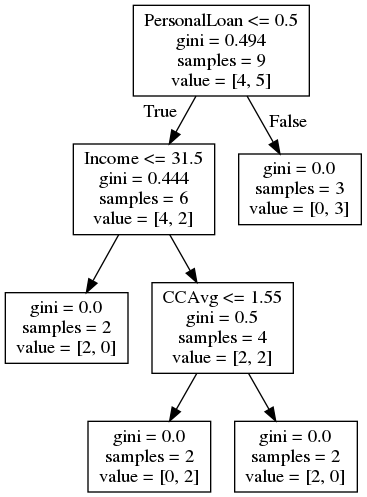

In [5]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [14]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=14)
clf = clf.fit(X, y)


# A credit-worthy client
print (clf.predict([[10, 100, 4, 1, 0, 1, 4, 1, 0, 1, 1, 1, 1]]))


[1]


In [15]:
clf.score(X, y)

1.0

In [17]:
'''Determing the amount of credit to give'''
def cal_amount(income):
    rate = 0.13
    amount = (rate / 4) * income
    return amount


In [18]:
cal_amount(5000)

162.5